# Task - Exploratory Data Analysis (EDA) on Dataset - Terrorism 

# Name - Akash Godbole

# DATA ANALYTICS - LGM Virtual Internship Program 2021

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
terr_df= pd.read_csv('globalterrorismdb_0718dist.csv', encoding="ISO-8859-1")

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
terr_df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [4]:
terr_df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [5]:
terr_df.shape

(181691, 135)

In [6]:
terr_df.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','region_txt':'Region',
                       'attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed','nwound':'Wounded',
                       'summary':'Summary','gname':'Group','targtype1_txt':'Target_type','weaptype1_txt':'Weapon_type',
                       'motive':'Motive'},
              inplace=True)

In [7]:
terr_df.head()

,eventid,Year,Month,Day,approxdate,extended,resolution,country,Country,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [8]:
# select useful columns from dataset
terr_df = terr_df[['Year','Month','Day','Country','Region','city','latitude','longitude','AttackType','Killed','Wounded','Target',
             'Summary','Group','Target_type','Weapon_type','Motive']]
# adding casualities columns
terr_df['casualities']=terr_df['Killed']+terr_df['Wounded']
terr_df.head()

,Year,Month,Day,Country,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive,casualities
0,1970,7,2,Dominican Republic,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN,1.0
1,1970,0,0,Mexico,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN,0.0
2,1970,1,0,Philippines,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN,1.0
3,1970,1,0,Greece,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives,NaN,NaN
4,1970,1,0,Japan,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN,NaN


In [9]:
terr_df.isnull().sum()

Year                0
Month               0
Day                 0
Country             0
Region              0
city              434
latitude         4556
longitude        4557
AttackType          0
Killed          10313
Wounded         16311
Target            636
Summary         66129
Group               0
Target_type         0
Weapon_type         0
Motive         131130
casualities     16874
dtype: int64

In [10]:
terr_df.nunique()

Year               47
Month              13
Day                32
Country           205
Region             12
city            36674
latitude        48322
longitude       48039
AttackType          9
Killed            205
Wounded           238
Target          86006
Summary        112492
Group            3537
Target_type        22
Weapon_type        12
Motive          14490
casualities       341
dtype: int64

In [11]:
terr_df.describe()

,Year,Month,Day,latitude,longitude,Killed,Wounded,casualities
count,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,171378.000000,165380.000000,164817.000000
mean,2002.638997,6.467277,15.505644,23.498343,-4.586957e+02,2.403272,3.167668,5.296128
std,13.259430,3.388303,8.814045,18.569242,2.047790e+05,11.545741,35.949392,42.069023
min,1970.000000,0.000000,0.000000,-53.154613,-8.618590e+07,0.000000,0.000000,0.000000
25%,1991.000000,4.000000,8.000000,11.510046,4.545640e+00,0.000000,0.000000,0.000000
50%,2009.000000,6.000000,15.000000,31.467463,4.324651e+01,0.000000,0.000000,1.000000
75%,2014.000000,9.000000,23.000000,34.685087,6.871033e+01,2.000000,2.000000,4.000000
max,2017.000000,12.000000,31.000000,74.633553,1.793667e+02,1570.000000,8191.000000,9574.000000


# Analysis Of Data

In [12]:
print('Country with Highest Terrorist Attacks is',terr_df['Country'].value_counts().index[0])

Country with Highest Terrorist Attacks is Iraq


In [13]:
print('Regions with Highest Terrorist Attacks:',terr_df['Region'].value_counts().index[0])

Regions with Highest Terrorist Attacks: Middle East & North Africa


In [14]:
print('Maximum people killed in an attack are:',terr_df['Killed'].max())

Maximum people killed in an attack are: 1570.0


In [15]:
print("Year with the most attacks:",terr_df['Year'].value_counts().idxmax())

Year with the most attacks: 2014


In [16]:
print("Month with the most attacks:",terr_df['Month'].value_counts().idxmax())

Month with the most attacks: 5


In [17]:
print("Most Attack Types:",terr_df['AttackType'].value_counts().idxmax())

Most Attack Types: Bombing/Explosion


<AxesSubplot:>

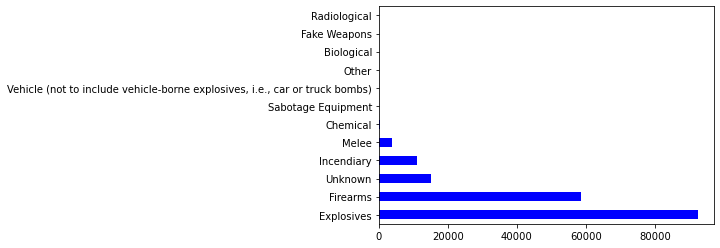

In [18]:
terr_df['Weapon_type'].value_counts().plot(kind="barh",color="blue")

# Terrorist Activities Over a year

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


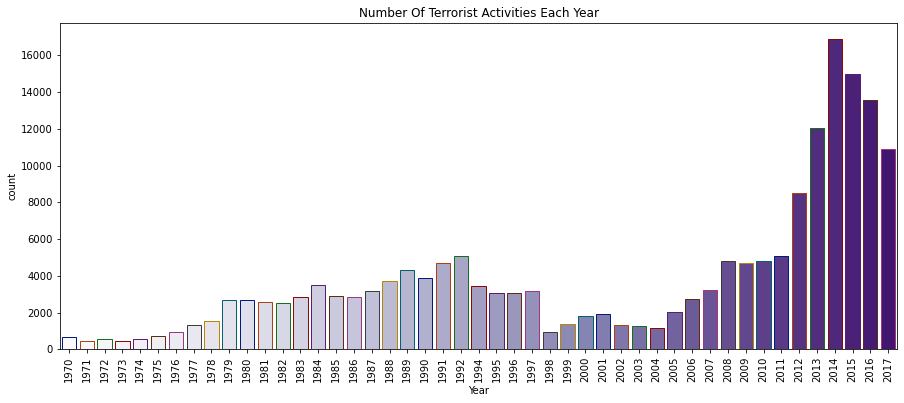

In [22]:
plt.subplots(figsize=(15,6))
sns.countplot('Year',data=terr_df,palette='Purples',edgecolor=sns.color_palette('dark',10))
plt.xticks(rotation=90)
plt.title('Number Of Terrorist Activities Each Year')
plt.show()

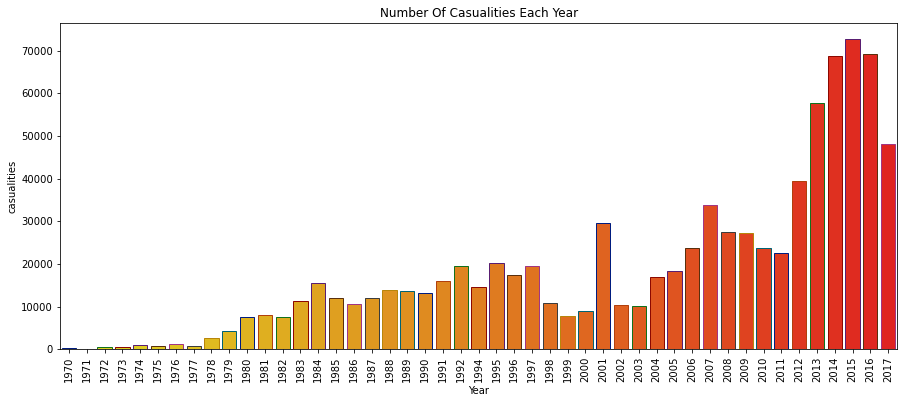

In [23]:
plt.subplots(figsize=(15,6))
year_cas = terr_df.groupby('Year').casualities.sum().to_frame().reset_index()
year_cas.columns = ['Year','casualities']
sns.barplot(x=year_cas.Year, y=year_cas.casualities, palette='autumn_r',edgecolor=sns.color_palette('dark',10))
plt.xticks(rotation=90)
plt.title('Number Of Casualities Each Year')
plt.show()

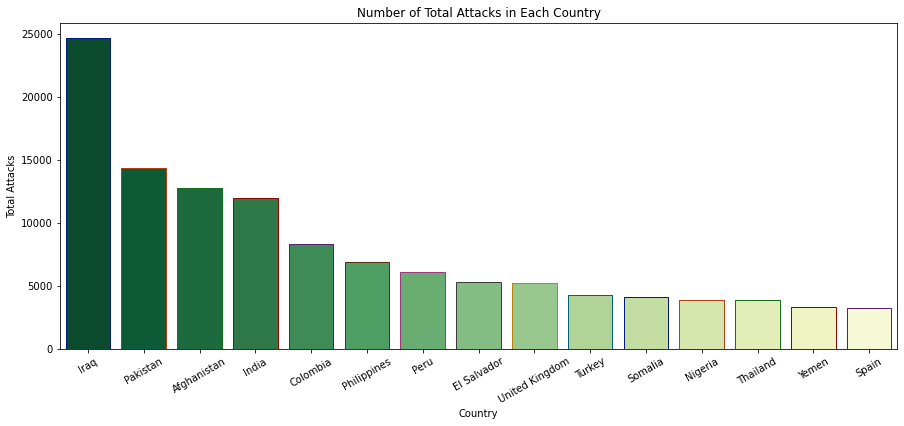

In [24]:
plt.subplots(figsize=(15,6))
country_attacks = terr_df.Country.value_counts()[:15].reset_index()
country_attacks.columns = ['Country', 'Total Attacks']
sns.barplot(x=country_attacks.Country, y=country_attacks['Total Attacks'], palette= 'YlGn_r',edgecolor=sns.color_palette('dark',10))
plt.xticks(rotation=30)
plt.title('Number of Total Attacks in Each Country')
plt.show()

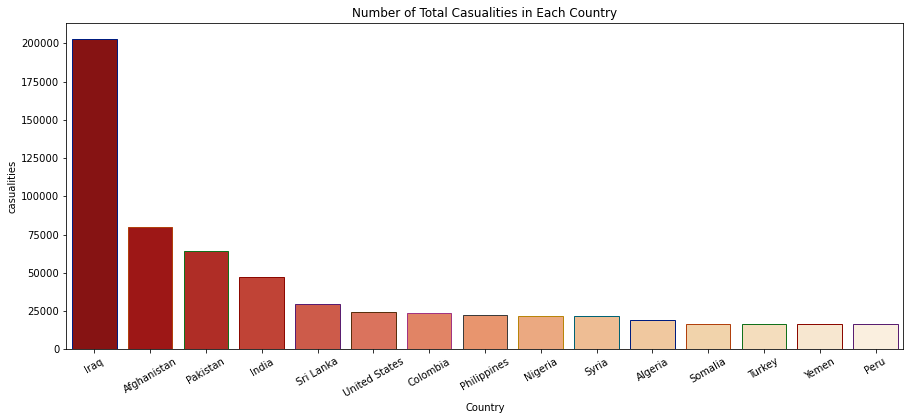

In [25]:
plt.subplots(figsize=(15,6))
count_cas = terr_df.groupby('Country').casualities.sum().to_frame().reset_index().sort_values('casualities', ascending=False)[:15]
sns.barplot(x=count_cas.Country, y=count_cas.casualities, palette= 'OrRd_r',edgecolor=sns.color_palette('dark',10))
plt.xticks(rotation=30)
plt.title('Number of Total Casualities in Each Country')
plt.show()

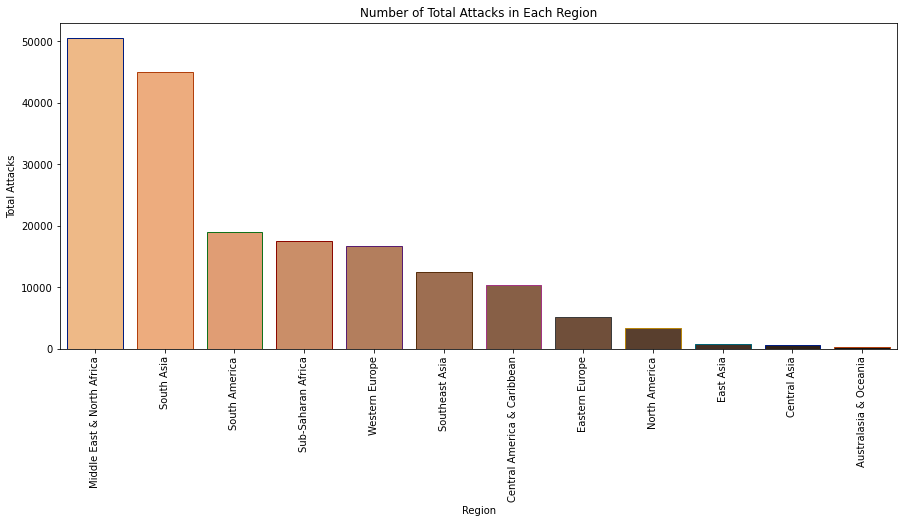

In [26]:
region_attacks = terr_df.Region.value_counts().to_frame().reset_index()
region_attacks.columns = ['Region', 'Total Attacks']
plt.subplots(figsize=(15,6))
sns.barplot(x=region_attacks.Region, y=region_attacks['Total Attacks'], palette='copper_r', edgecolor=sns.color_palette('dark',10))
plt.xticks(rotation=90)
plt.title('Number of Total Attacks in Each Region')
plt.show()

Middle east and north africa are most Attacks region

# Terrorism in india

In [27]:
group_country = terr_df.groupby('Country')
india = group_country.get_group('India')

# Most affected cities of India

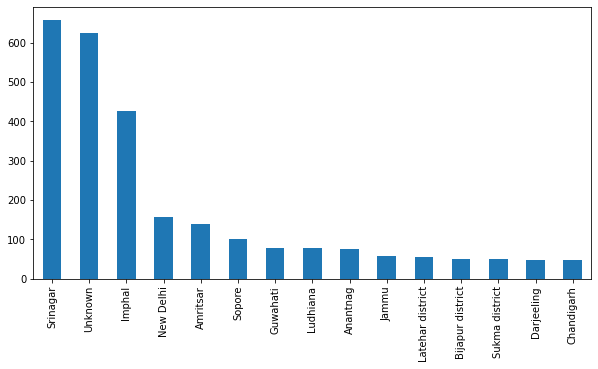

In [28]:
india['city'].value_counts().nlargest(15).plot(kind='bar', figsize=(10,5))
plt.show()

Srinagar is most effected city in india

# Terrorist activites trends over the year in India

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


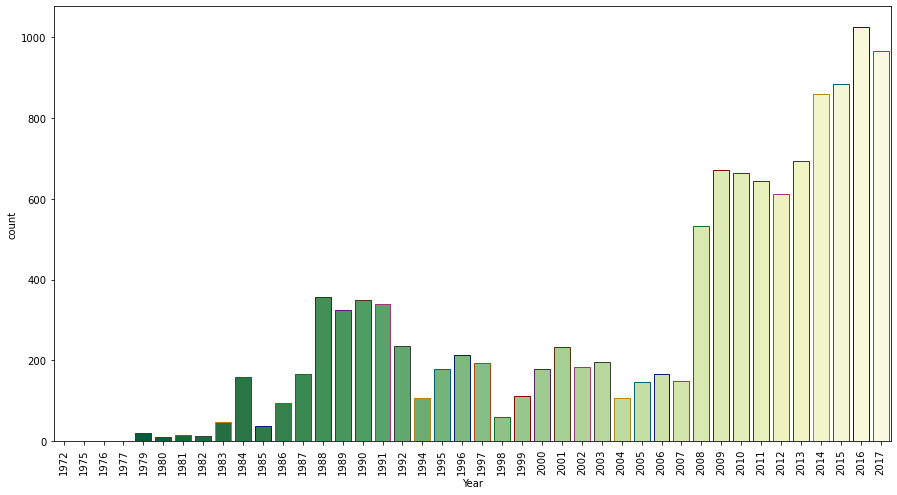

In [29]:
plt.figure(figsize=(15,8))
sns.countplot(india['Year'],palette='YlGn_r',edgecolor=sns.color_palette('dark',10))
plt.xticks(rotation=90)
plt.show()

# Deadlist terrorist group in india

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


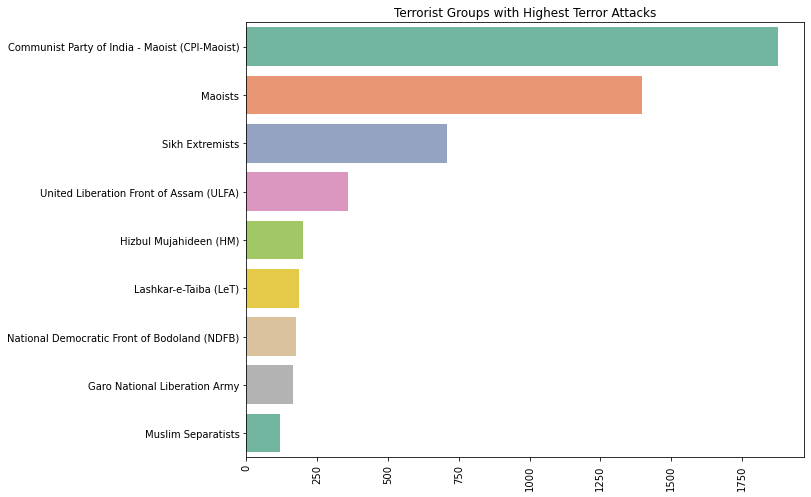

In [30]:
sns.barplot(india['Group'].value_counts()[1:10].values,india['Group'].value_counts()[1:10].index,palette='Set2')
plt.xticks(rotation=90)
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.title('Terrorist Groups with Highest Terror Attacks')
plt.show()

# Killing trends over a year in India

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


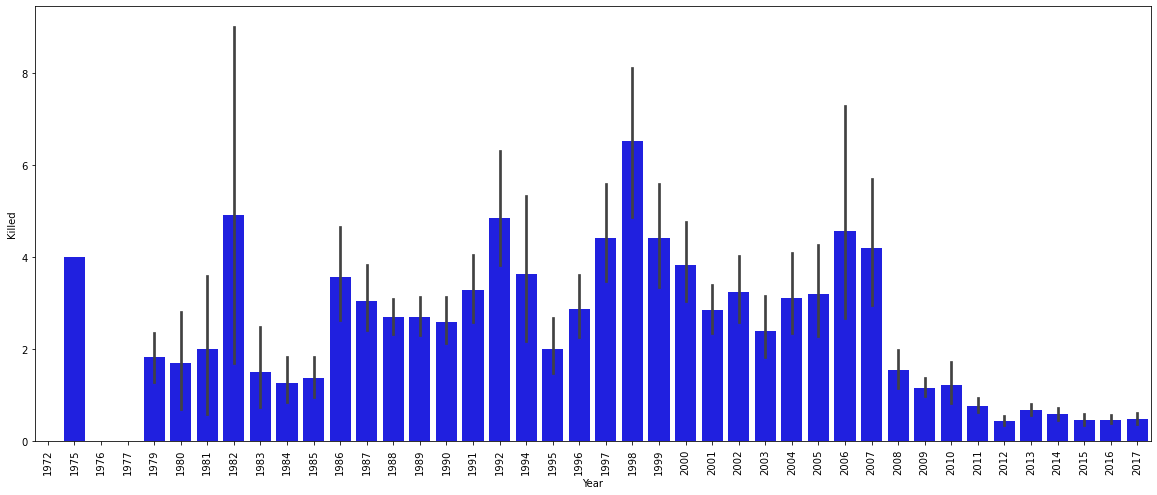

In [31]:
plt.figure(figsize=(20,8))
sns.barplot(india['Year'],india['Killed'],color='blue')
plt.xticks(rotation=90)
plt.show()

# Type of attack in india

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


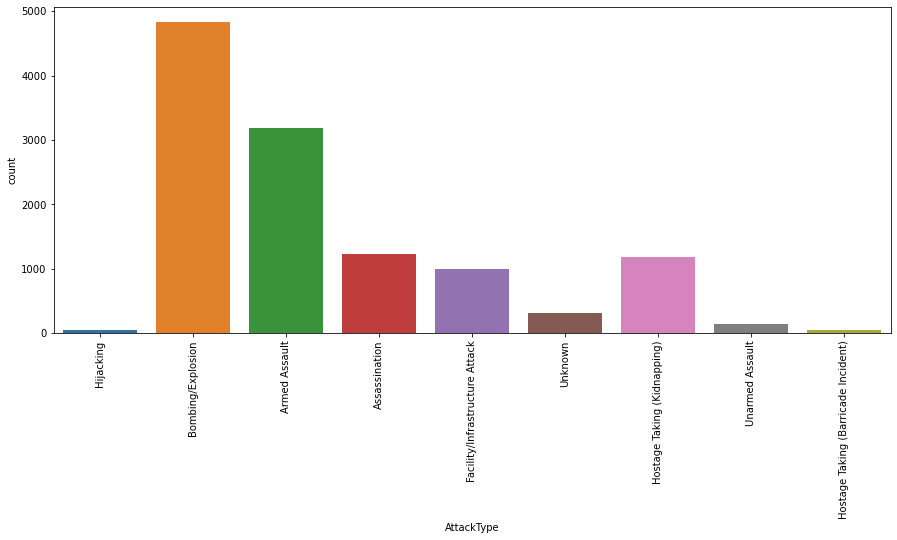

In [32]:
plt.figure(figsize=(15,6))
sns.countplot(india['AttackType'])
plt.xticks(rotation=90)
plt.show()

Bombing/Explosion and armed Assault most preferable attacks in India

# Conclusion

1- Hot zones of terrorism is Middle east and North Arica so, all the countries should focus in these region.


2- Iraq, Afganistan and Pakistan most suffered country, Government should be aware from the citizens of these countries.

3- Terrorist like to target Private citizens, Army and Police mostly, Security should be tighten in all these areas.


4- All country should have to make pact to to tackle terrorism because after 2005 there is rapid increase in Terrorist Activites.